In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./PatientTreatment/training_set.csv')
df.head()


,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,33.8,11.1,4.18,4.6,150,26.6,32.8,80.9,33,F,1
1,44.6,14.0,6.86,6.3,232,20.4,31.4,65.0,36,M,0
2,42.9,14.0,4.57,6.2,336,30.6,32.6,93.9,70,F,0
3,41.9,14.4,4.67,3.5,276,30.8,34.4,89.7,18,F,0
4,40.6,13.3,4.85,14.9,711,27.4,32.8,83.7,36,M,0


Number of istances:  3309
Numbero of missing values:  0
Balance:  0    0.601995
1    0.398005
Name: SOURCE, dtype: float64
Unique values of AGE:  95


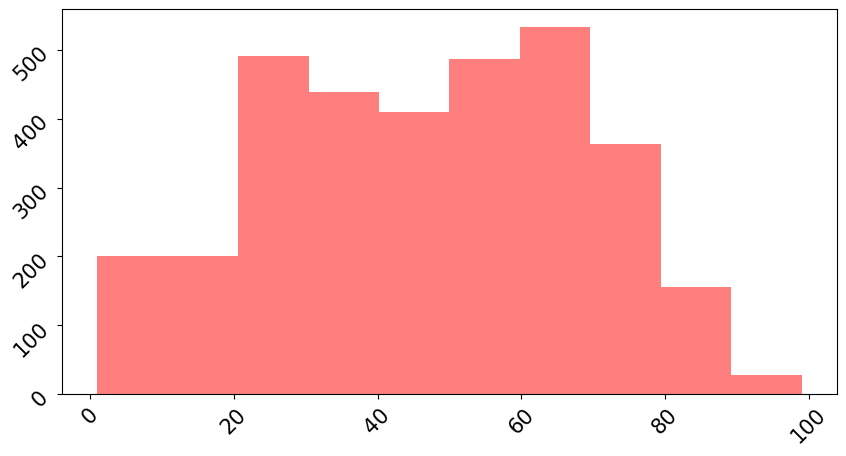

In [79]:
print("Number of istances: ", len(df))
print("Numbero of missing values: ", df.isnull().sum().sum())
print("Balance: ", df['SOURCE'].value_counts(normalize=True))
print("Unique values of AGE: ", len(df['AGE'].unique()))
df['AGE'].hist(bins=10, figsize=(10, 5), color='red', alpha=0.5, grid=False, xlabelsize=15, ylabelsize=15, xrot=45, yrot=45)
plt.show()

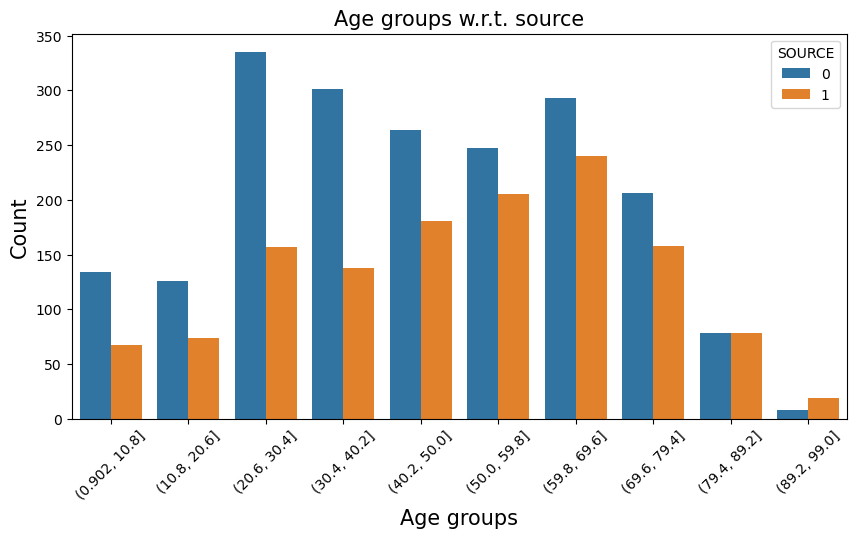

SEX  SOURCE
F    0         0.631545
     1         0.368455
M    0         0.575445
     1         0.424555
Name: SOURCE, dtype: float64

In [80]:
# Crea 10 gruppi di età
age_groups = pd.cut(df['AGE'], bins=10)
age_groups.value_counts()

#histogram of age groups w.r.t. source
plt.figure(figsize=(10, 5))
sns.countplot(x=age_groups, hue='SOURCE', data=df)
plt.xticks(rotation=45)
plt.xlabel('Age groups', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Age groups w.r.t. source', fontsize=15)
plt.show()

df.groupby('SEX')['SOURCE'].value_counts(normalize=True)



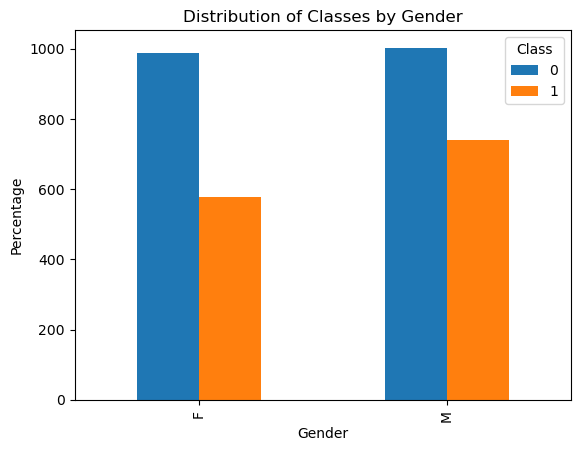

In [81]:
gender_class_counts = pd.crosstab(df['SEX'], df['SOURCE'])
gender_class_counts.plot(kind='bar', stacked=False)
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.title('Distribution of Classes by Gender')
plt.legend(title='Class')
plt.show()

In [82]:
#pivot table
pivot = pd.pivot_table(df, values='SOURCE', index = age_groups, columns=['SEX'], aggfunc='count')
#sostiuisco i valori NaN con 0
pivot = pivot.fillna(0)
pivot

SEX,F,M
AGE,,
"(0.902, 10.8]",96,105
"(10.8, 20.6]",92,108
"(20.6, 30.4]",247,245
"(30.4, 40.2]",228,211
"(40.2, 50.0]",209,236
"(50.0, 59.8]",193,259
"(59.8, 69.6]",242,291
"(69.6, 79.4]",153,211
"(79.4, 89.2]",83,73


PARTE 2

In [83]:
df = pd.read_csv('./PatientTreatment/training_set.csv')
df.head()   

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,33.8,11.1,4.18,4.6,150,26.6,32.8,80.9,33,F,1
1,44.6,14.0,6.86,6.3,232,20.4,31.4,65.0,36,M,0
2,42.9,14.0,4.57,6.2,336,30.6,32.6,93.9,70,F,0
3,41.9,14.4,4.67,3.5,276,30.8,34.4,89.7,18,F,0
4,40.6,13.3,4.85,14.9,711,27.4,32.8,83.7,36,M,0


In [84]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
# LabelEncoder
le = LabelEncoder()
df['SEX'] = le.fit_transform(df['SEX'])
data_text = df.drop(['SOURCE'], axis=1)
data_label = df['SOURCE']

X_train, X_test, y_train, y_test = train_test_split(data_text, data_label, test_size=1/3, random_state=42)
df

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,33.8,11.1,4.18,4.6,150,26.6,32.8,80.9,33,0,1
1,44.6,14.0,6.86,6.3,232,20.4,31.4,65.0,36,1,0
2,42.9,14.0,4.57,6.2,336,30.6,32.6,93.9,70,0,0
3,41.9,14.4,4.67,3.5,276,30.8,34.4,89.7,18,0,0
4,40.6,13.3,4.85,14.9,711,27.4,32.8,83.7,36,1,0
...,...,...,...,...,...,...,...,...,...,...,...
3304,39.0,13.2,4.45,4.0,50,29.7,33.8,87.6,45,1,1
3305,25.4,8.2,3.27,5.4,90,25.1,32.3,77.7,1,0,1
3306,38.2,12.4,4.40,8.4,328,28.2,32.5,86.8,64,1,0
3307,43.4,15.2,5.29,10.1,326,28.7,35.0,82.0,33,1,0


In [85]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

print("Decision Tree")
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_tree = dt.predict(X_test)
print("Accuracy on training set: ", dt.score(X_train, y_train))
print("Accuracy: ", accuracy_score(y_test, y_pred_tree))

print("Logistic Regression")
# Logistic Regression
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)
y_pred_loss = lr.predict(X_test)
print("Accuracy on training set: ", lr.score(X_train, y_train))
print("Accuracy: ", accuracy_score(y_test, y_pred_loss))


Decision Tree
Accuracy on training set:  1.0
Accuracy:  0.6609247506799637
Logistic Regression
Accuracy on training set:  0.7203082502266546
Accuracy:  0.7280145058930191


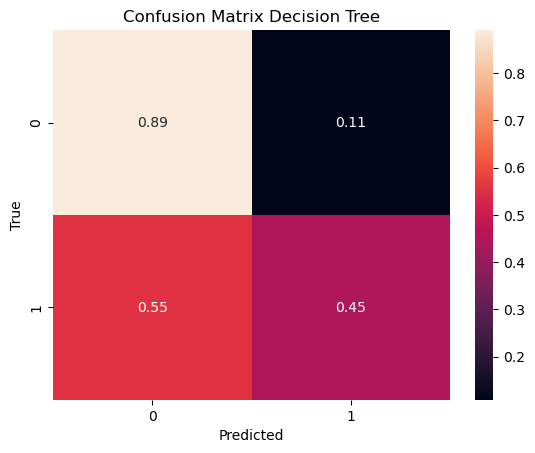

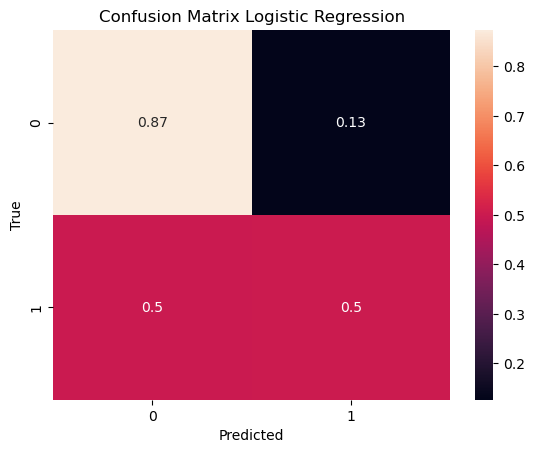

In [86]:
from sklearn.metrics import confusion_matrix

#heatmap
cm_tree = confusion_matrix(y_test, y_pred_tree, normalize='true')
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

cm_loss = confusion_matrix(y_test, y_pred_loss, normalize='true')
sns.heatmap(cm_loss, annot=True)
plt.title('Confusion Matrix Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [87]:
from sklearn.model_selection import cross_val_score
#cross validation
print("Decision Tree")
scores = cross_val_score(dt, data_text, data_label, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("Logistic Regression")
scores = cross_val_score(lr, data_text, data_label, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Decision Tree
Accuracy: 0.66 (+/- 0.06)
Logistic Regression
Accuracy: 0.72 (+/- 0.04)


In [91]:
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import KBinsDiscretizer

dis = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
data_text['AGE'] = dis.fit_transform(data_text['AGE'].values.reshape(-1, 1))
data_text['THROMBOCYTE'] = dis.fit_transform(data_text['THROMBOCYTE'].values.reshape(-1, 1))

abs_scaler = MaxAbsScaler()
data_text = abs_scaler.fit_transform(data_text)

In [92]:
print("Decision Tree")
scores = cross_val_score(dt, data_text, data_label, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("Logistic Regression")
scores = cross_val_score(lr, data_text, data_label, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Decision Tree
Accuracy: 0.66 (+/- 0.04)
Logistic Regression
Accuracy: 0.70 (+/- 0.04)


In [94]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer

data_text = df.drop(['SOURCE'], axis=1)
transformer = ColumnTransformer([('discretizer_age', KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform'), ['AGE']), ('discetizer_thrombocyte', KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform'), ['THROMBOCYTE'])], remainder='passthrough')
preprocess = Pipeline([('transformer', transformer), ('scaler', MaxAbsScaler()), ('normalizer', Normalizer())])
data_text = preprocess.fit_transform(data_text)

print("Decision Tree")
scores = cross_val_score(dt, data_text, data_label, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Decision Tree
Accuracy: 0.65 (+/- 0.05)


In [99]:
from sklearn.linear_model import LinearRegression

print("Linear Regression")
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
y_pred_lr = np.round(y_pred_lr)
print("Accuracy: ", accuracy_score(y_test, y_pred_lr))


Linear Regression
Accuracy:  0.7262012692656392


In [101]:
from sklearn.model_selection import GridSearchCV

# Decision Tree
parameters = {'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'criterion': ['gini', 'entropy'], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]}
clf = GridSearchCV(dt, parameters, cv=10)
clf.fit(data_text, data_label)
print("Decision Tree")
print("Best parameters set found:")
print(clf.best_params_)
print("Best score:")
print(clf.best_score_)

# Linear Regression
parameters = {'fit_intercept': [True, False], 'copy_X': [True, False]}
clf = GridSearchCV(lr, parameters, cv=10)
clf.fit(data_text, data_label)
print("Linear Regression")
print("Best parameters set found:")
print(clf.best_params_)
print("Best score:")
print(clf.best_score_)



Decision Tree
Best parameters set found:
{'criterion': 'entropy', 'max_features': 5, 'min_samples_split': 3}
Best score:
0.6784564680032957
Linear Regression
Best parameters set found:
{'copy_X': True, 'fit_intercept': False}
Best score:
0.12667210566575265
